# Final Project: Breast Cancer Wisconsin

## Import the dataset
- drop the unnecessary ID column
- filter only the relevant features
- separate the y column from the dataset into a vector of its own
- encode y into 0= Benign and 1= Malignant
- separate data into training and testing sets

In [107]:
import pandas as pd
df = pd.read_csv("data.csv")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# drop the ID column
df.drop(df.columns[0], axis=1, inplace=True)

# List of mean features to keep
mean_features = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'
]

# Include the target column
features_to_keep = mean_features + ['diagnosis']

# Filter the dataset
filtered_df = df[features_to_keep]

le = LabelEncoder()
X = filtered_df.drop(columns=["diagnosis"]).astype(float).values # Features
y = le.fit_transform(filtered_df["diagnosis"]).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 1. Implement the Decision Tree model

In [108]:
import importlib
import decision_tree
importlib.reload(decision_tree)
from decision_tree import DecisionTree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

tree = DecisionTree(min_samples_split= 3, max_depth=4)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print(classification_report(y_test, y_pred))


Accuracy: 0.9474
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



## The Visualisation 

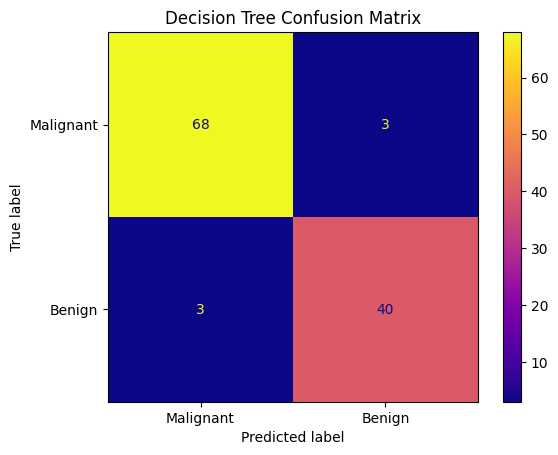

In [109]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate and plot the confusion matrix directly from the true and predicted labels.
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=["Malignant", "Benign"],
    cmap="plasma"
)

# Add a descriptive title to the confusion matrix plot
plt.title("Decision Tree Confusion Matrix")

# Render and display the plot in the output window
plt.show()


## 1. Implement the Random Forest model

In [110]:
import random_forest
importlib.reload(random_forest)
from random_forest import RandomForest  # assuming you saved your RF class in random_forest.py
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Make sure X_train, X_test, y_train, y_test are all numpy arrays
X_train_np = X_train.to_numpy() if hasattr(X_train, "to_numpy") else X_train
X_test_np = X_test.to_numpy() if hasattr(X_test, "to_numpy") else X_test
y_train_np = y_train.ravel()  # flatten to 1D for your DecisionTree
y_test_np = y_test.ravel()

# Initialize and train Random Forest
rf = RandomForest(n_estimators=10, min_samples_split=3, max_depth=4, max_features=None)
rf.fit(X_train_np, y_train_np)

# Predict
y_pred = rf.predict(X_test_np)

# Evaluate
accuracy = accuracy_score(y_test_np, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test_np, y_pred))


Accuracy: 0.9386
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



## The Visualisation

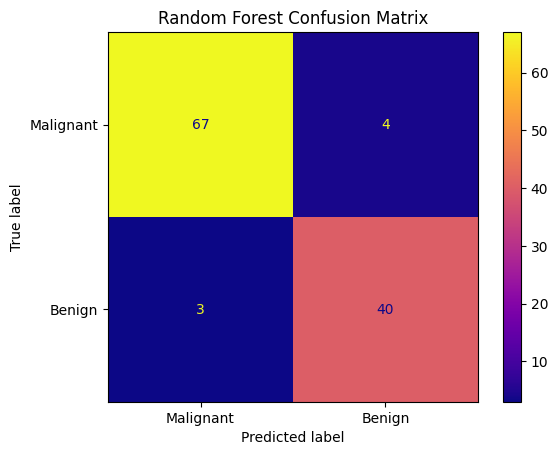

In [111]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate and plot the confusion matrix directly from the true and predicted labels.
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=["Malignant", "Benign"],
    cmap="plasma"
)

# Add a descriptive title to the confusion matrix plot
plt.title("Random Forest Confusion Matrix")

# Render and display the plot in the output window
plt.show()
